<a href="https://colab.research.google.com/github/bayuryunarko/belajar-sklearn/blob/main/7_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Latihan SKLearn dari channel Youtube "Indonesia Belajar"

##Classification Task dengan Naive Bayes

###Bayes' Theorem

Bayes' theorem menawarkan suatu formula untuk menghitung nilai probability dari suatu event dengan memanfaatkan pengetahuan sebelumnya dari kondisi terkait atau sering kali dikenal dengan istilah conditional probability

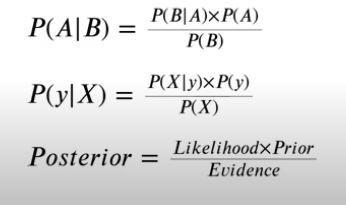

###Pengenalan Naive Bayes Classification

*Studi Kasus 1*

Asep : siomay : 0.1, bakso : 0.8, lumpia : 0.1
Joko : siomay : 0.5, bakso : 0.2, lumpia : 0.3

**Misi :** Lakukan prediksi siapa pelanggan yang melakukan pemesanan dengan diketahui pesanannya adalah lumpia dan bakso

*Prior Probability : P(y)* 
- *P(Asep)* = 0.5
- *P(Joko)* = 0.5

*Likelihood : P(X|y)*
- Asep:
P(lumpia, bakso|Asep) = (0.1 x 0.8) = 0.08
- Joko:
P(lumpia, bakso|Joko) = (0.3 x 0.2) = 0.06

*Evidence atau Normalizer: P(X)*
- Evidence = jumlahan total (likelihood x prior)
- P(lumpia, bakso) = (0.08 x 0.5) + (0.06 x 0.5) = 0.07

*Posterior Probability : P(y|X)*
- Asep :
P(Asep|lumpia, bakso) = (0.08 x 0.5)/0.7 = 0.57
- Joko :
P(Joko|lumpia, bakso) = (0.06 x 0.5)/0.7 = 0.43

Sehingga pada algoritma ini dianggap jawabannya adalah Asep

###Mengapa disebut Niave?

- Karena sewaktu kita mendefinisikan Likelihood ***P(lumpia, bakso|Asep)***
- Kita mengasumsikan ***P(lumpia|Asep)*** conditionally independent terhadap ***P(bakso|Asep)*** , demikian sebaliknya
-Sehingga dapat diformulasikan sebagai berikut:
 
 ***P(lumpia, bakso|Asep) = P(lumpia|Asep) x P(bakso|Asep)***

###Dataset : Breast Cancer Wisconsin (Diagnostic)

Load Dataset

In [2]:
from sklearn.datasets import load_breast_cancer

print(load_breast_cancer().DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [3]:
X, y = load_breast_cancer(return_X_y=True)
X.shape

(569, 30)

In [5]:
load_breast_cancer?

Training dan Testing Set

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(f'X_train shape : {X_train.shape}')
print(f'X_test shape : {X_test.shape}')

X_train shape : (455, 30)
X_test shape : (114, 30)


###Naive Bayes dengan Scikit Learn

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9298245614035088

In [8]:
model.score(X_test, y_test)

0.9298245614035088